## Code for running PCA on n=170 oysters + measurements from CMAST + DUML aquafarms

In [5]:
## load data
import pandas as pd
df = pd.read_excel("/Users/henrysun_1/Desktop/Duke/2024-2025/Fall 2024/Marsci273 Ecology/oysterdrill/data/Lexi_WorkingOysterData.xlsx")
df
## keep everything that starts with letter N
n_variables_df = df.filter(regex=r'^N')
n_variables_df = pd.concat([df[['Oyster Number', 'Sample Location']], n_variables_df], axis=1)
df = n_variables_df
df

,Oyster Number,Sample Location,N Shell Density (g/mL),N Length,N Width,N Tissue Mass,N Shell Thickness,N Shell Mass,N Shell Volume
0,1,DUML Aquafarm,1.756864,0.458333,0.239583,0.089822,0.031802,0.713247,0.585235
1,2,DUML Aquafarm,1.670424,0.666667,0.310345,0.092033,0.049943,0.662372,0.630171
2,3,DUML Aquafarm,1.393952,0.600000,0.287500,0.126356,0.033675,0.616594,0.700143
3,4,DUML Aquafarm,1.101131,0.634409,0.279570,0.120863,0.032194,0.529177,0.618391
4,5,DUML Aquafarm,1.297512,0.543210,0.234568,0.097987,0.028469,0.548322,0.551694
...,...,...,...,...,...,...,...,...,...
97,98,CMAST Aquafarm,1.128470,0.647059,0.308824,0.092285,0.045544,0.518694,0.508202
98,99,CMAST Aquafarm,1.151201,0.609375,0.328125,0.089511,0.054984,0.545678,0.535255
99,100,CMAST Aquafarm,1.512576,0.522388,0.268657,0.125443,0.036687,0.618001,0.484861
100,101,CMAST Aquafarm,1.200232,0.710526,0.350877,0.068707,0.041772,0.673396,0.717618


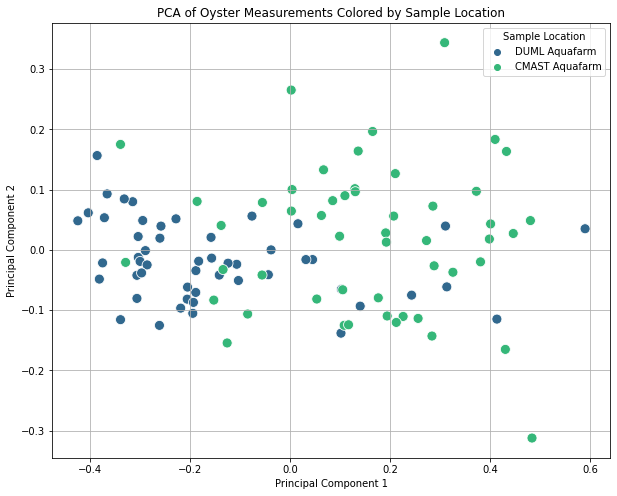

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

n_features = df.filter(regex=r'^N')

pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(n_features)

# Create a new dataframe for PCA results and metadata
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Sample Location'] = df['Sample Location']


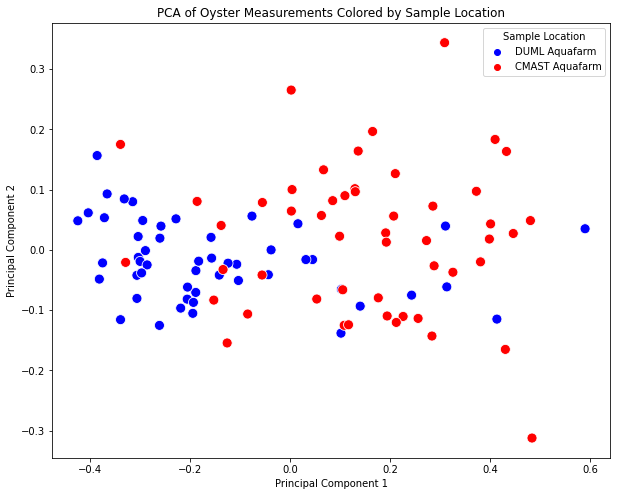

In [10]:
pca_df

custom_palette = {
    df['Sample Location'].unique()[0]: 'blue',
    df['Sample Location'].unique()[1]: 'red'
}

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Sample Location',
    data=pca_df,
    palette=custom_palette,
    s=100
)
plt.title('PCA of Oyster Measurements Colored by Sample Location')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Location', loc='best')
# plt.grid(True)
plt.show()

## Running on n=170 dataset

In [18]:
df2 = pd.read_excel("/Users/henrysun_1/Desktop/Duke/2024-2025/Fall 2024/Marsci273 Ecology/oysterdrill/data/Lexi_MasterOysterData.xlsx")
df2
n_variables_df2 = df2.filter(regex=r'^N')
n_variables_df2 = pd.concat([df2[['Oyster Number', 'Sample Location']], n_variables_df2], axis=1)
df2 = n_variables_df2
n_variables_df2

,Oyster Number,Sample Location,N Shell Density (g/mL),N Length,N Width,N Tissue Mass,N Shell Mass
0,1,DUML Aquafarm,1.756864,0.458333,0.239583,0.089822,0.713247
1,2,DUML Aquafarm,1.670424,0.666667,0.310345,0.092033,0.662372
2,3,DUML Aquafarm,1.393952,0.600000,0.287500,0.126356,0.616594
3,4,DUML Aquafarm,1.101131,0.634409,0.279570,0.120863,0.529177
4,5,DUML Aquafarm,1.297512,0.543210,0.234568,0.097987,0.548322
...,...,...,...,...,...,...,...
165,166,CMAST Aquafarm,1.663312,0.552448,0.279720,0.054037,0.752795
166,167,CMAST Aquafarm,1.669440,0.571429,0.369748,0.077116,0.756091
167,168,CMAST Aquafarm,1.406872,0.444444,0.205556,0.087527,0.680963
168,169,CMAST Aquafarm,1.417021,0.700000,0.380000,0.088532,0.734405


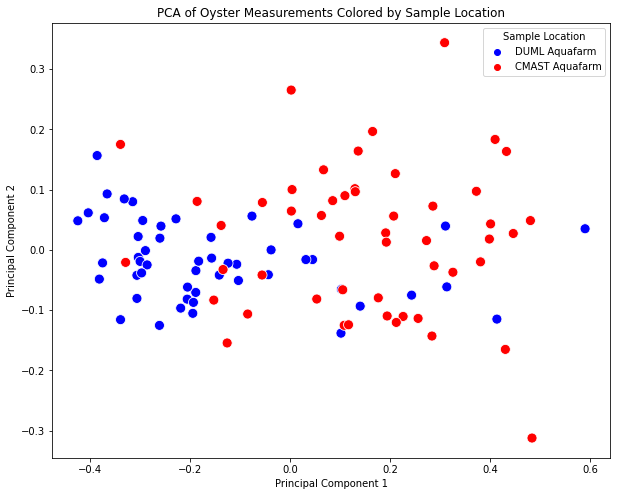

In [ ]:
n_features2 = df2.filter(regex=r'^N')

pca2 = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result2 = pca2.fit_transform(n_features2)

# Create a new dataframe for PCA results and metadata
pca_df2 = pd.DataFrame(pca_result2, columns=['PC1', 'PC2'])
pca_df2['Sample Location'] = df2['Sample Location']

custom_palette = {
    df2['Sample Location'].unique()[0]: 'blue',
    df2['Sample Location'].unique()[1]: 'red'
}

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Sample Location',
    data=pca_df2,
    palette=custom_palette,
    s=100
)
plt.title('PCA of Oyster Measurements Colored by Sample Location')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Location', loc='best')
# plt.grid(True)
plt.show()